In [1]:
import pandas as pd



acs = pd.read_csv('data/acs_ny.csv')

acs.columns

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')

In [2]:
acs.head()

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
0,1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English
1,1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English
2,1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European
3,1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English
4,1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish


In [3]:
acs.dtypes

Acres           object
FamilyIncome     int64
FamilyType      object
NumBedrooms      int64
NumChildren      int64
NumPeople        int64
NumRooms         int64
NumUnits        object
NumVehicles      int64
NumWorkers       int64
OwnRent         object
YearBuilt       object
HouseCosts       int64
ElectricBill     int64
FoodStamp       object
HeatingFuel     object
Insurance        int64
Language        object
dtype: object

In [4]:
acs['ge150k'] = pd.cut(acs['FamilyIncome'],[0, 150000, acs['FamilyIncome'].max()],labels=[0, 1])

acs['ge150k_i'] = acs['ge150k'].astype(int)

print(acs['ge150k_i'].value_counts())

0    18294
1     4451
Name: ge150k_i, dtype: int64


In [5]:
acs[acs['ge150k_i']==1].head()

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language,ge150k,ge150k_i
3811,1-10,150050,Married,4,2,4,7,Single detached,3,2,Mortgage,1980-1989,2200,90,No,Oil,500,English,1,1
3812,1-10,150100,Married,4,1,4,10,Single detached,3,2,Mortgage,1990-1999,2000,100,No,Oil,500,English,1,1
3813,1-10,150300,Married,2,0,2,5,Single detached,2,1,Mortgage,1960-1969,1300,160,No,Oil,920,English,1,1
3814,1-10,150300,Married,3,2,4,8,Single detached,2,1,Mortgage,1970-1979,2000,80,No,Oil,1000,English,1,1
3815,1-10,150900,Married,4,1,4,7,Single detached,3,3,Mortgage,1940-1949,2000,90,No,Oil,1600,English,1,1


In [6]:
import statsmodels.formula.api as smf



model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + FamilyType', data = acs)

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7


In [7]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.2078
Time:                        22:54:22   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043      -5.573
OwnRent[T.Outright]         1.8276      0.208      8.782      0.000       1.420       2.236


In [8]:
import numpy as np
odds_ratios = np.exp(results.params)

print(odds_ratios)

Intercept                  0.003003
OwnRent[T.Outright]        6.219147
OwnRent[T.Rented]          0.416310
FamilyType[T.Male Head]    1.332901
FamilyType[T.Married]      4.005636
HouseCosts                 1.000731
NumWorkers                 1.799117
NumBedrooms                1.266852
dtype: float64


In [9]:
predictors = pd.get_dummies(

    acs[['HouseCosts', 'NumWorkers', 'OwnRent', 'NumBedrooms',

         'FamilyType']],

    drop_first=True)

In [10]:
predictors.head()

,HouseCosts,NumWorkers,NumBedrooms,OwnRent_Outright,OwnRent_Rented,FamilyType_Male Head,FamilyType_Married
0,1800,0,4,0,0,0,1
1,850,0,3,0,1,0,0
2,2600,1,4,0,0,0,0
3,1800,0,2,0,1,0,0
4,860,0,3,0,0,1,0


In [11]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=1000)

In [12]:
results = lr.fit(X = predictors, y = acs['ge150k_i'])

In [13]:
print(results.coef_)

[[ 7.26333361e-04  5.81574189e-01  2.38528787e-01  5.66490557e-01
  -6.91848053e-01 -3.34327809e-01  1.22059304e+00]]


In [14]:
print(results.intercept_)

[-5.62856799]


In [15]:
values = np.append(results.intercept_, results.coef_)

# get the names of the values

names = np.append('intercept', predictors.columns)

In [16]:
results = pd.DataFrame(values, index = names,

     columns=['coef'] # you need the square brackets here

)

In [17]:
results

,coef
intercept,-5.628568
HouseCosts,0.000726
NumWorkers,0.581574
NumBedrooms,0.238529
OwnRent_Outright,0.566491
OwnRent_Rented,-0.691848
FamilyType_Male Head,-0.334328
FamilyType_Married,1.220593


In [18]:
results = smf.poisson(

    'NumChildren ~ FamilyIncome + FamilyType + OwnRent',

    data=acs).fit()

Optimization terminated successfully.
         Current function value: nan
         Iterations 1


/opt/anaconda3/envs/pfe/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1333: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
/opt/anaconda3/envs/pfe/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1334: RuntimeWarning: overflow encountered in multiply
  return -np.dot(L*X.T, X)
/opt/anaconda3/envs/pfe/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1334: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
/opt/anaconda3/envs/pfe/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1243: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)


In [19]:
print(results.summary())

                          Poisson Regression Results                          
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22739
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                     nan
Time:                        22:54:22   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -30977.
Covariance Type:            nonrobust   LLR p-value:                       nan
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                      nan        nan        nan        nan         nan         nan
FamilyType[T.Male Head]        nan        nan        nan        nan         nan         nan


In [21]:
bladder = pd.read_csv('data/bladder.csv')

print(bladder.head())

   id  rx  number  size  stop  event  enum
0   1   1       1     3     1      0     1
1   1   1       1     3     1      0     2
2   1   1       1     3     1      0     3
3   1   1       1     3     1      0     4
4   2   1       2     1     4      0     1


In [22]:
print(bladder['rx'].value_counts())

1    188
2    152
Name: rx, dtype: int64


In [23]:
from lifelines import KaplanMeierFitter

In [24]:
kmf = KaplanMeierFitter()

kmf.fit(bladder['stop'], event_observed=bladder['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

In [25]:
import matplotlib.pyplot as plt

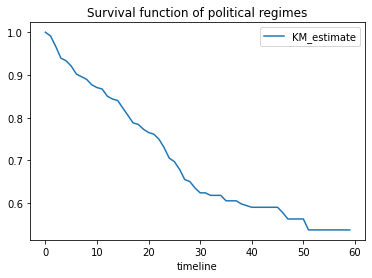

In [26]:
fig, ax = plt.subplots()

ax = kmf.survival_function_.plot(ax=ax)

ax.set_title('Survival function of political regimes')

plt.show()

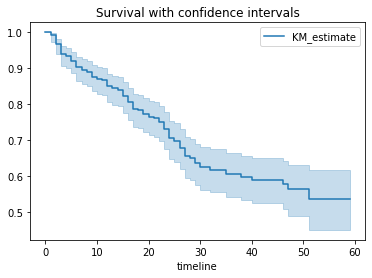

In [27]:
fig, ax = plt.subplots()

ax = kmf.plot(ax=ax)

ax.set_title('Survival with confidence intervals')

plt.show()

